# PyTorch Workflow

Exploring an end-to-end PyTorch workflow.

I utilise the following resources:

1. https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
2. https://www.learnpytorch.io/01_pytorch_workflow/

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

In [ ]:
import torch
from torch import nn # PyTorch's building blocks https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt
import numpy as np

# PyTorch Version
torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading).

Two main ideas are:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

<img src=https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png
width=900 alt="a game of 2 parts"/>

To showcase these steps we can generate some dummy data using the linear regression formula.

Using linear regressuion we'll make a stright line with known **parameters**.


In [ ]:
# Creating known parameters

bias = 0.3
weight = 0.7

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1) #the unsqueeze is important later for model building

y = weight*X + bias

X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

### Splitting data into training and testing set
creating a training and test set with our data.

In [ ]:
# Create a test/train split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualising

In [ ]:
def plot_predictions(train_data = X_train, train_label = y_train,
                     test_data = X_test, test_label = y_test,
                     predictions = None):
  """ Plots the train/test data and compares predictions. Outputs 1 Graph. """

  #Plot training data
  plt.scatter(train_data, train_label, c= "b", s = 4, label = "Training Data")

  #Plot testing data
  plt.scatter(X_test, y_test, c="g", s=4, label = "Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s=4, label = "Predictions")

  #Show Legend
  plt.legend(prop={"size": 14})

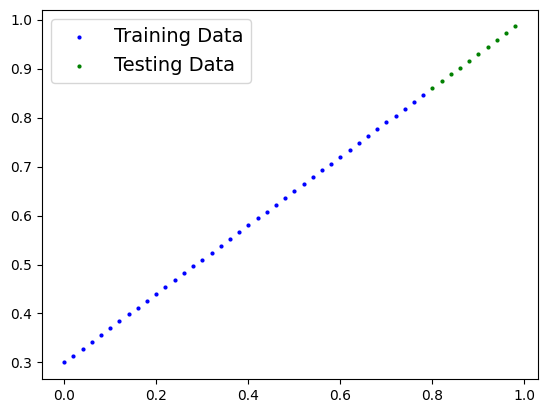

In [ ]:
plot_predictions()

## 2. Build Model
First PyTorch Model

In [ ]:
class LinearRegressionModel(nn.Module): #inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                              requires_grad = True,
                              dtype = torch.float))

    self.bias = nn.Parameter(torch.rand(1,
                           requires_grad= True,
                           dtype = torch.float))
    # Forward method
  def forward(self, x: torch.Tensor) -> torch.tensor: # <- "x" is the input data
    return self.weights*x + self.bias #this is the linear regression formula




###Checking the contents of the PyTorch model

We can check our model parameters using `.parameters()`

In [ ]:
# Creating random seed
#torch.manual_seed(42)

# Creating an instance of the model (this is a subcalss of nn.Module)
model_0 = LinearRegressionModel()

# Checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.9121], requires_grad=True),
 Parameter containing:
 tensor([0.6958], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.9121])), ('bias', tensor([0.6958]))])

### Making predictions using `torch.inference_mode()`
When we pass data through the model, it will run it through the `forward()` method.

The ` with torch.inference_mode()` does not store the gradients, this makes it faster than just using `y_pred = model_0(X_test)`

Inference is another term for prediction.

In [ ]:
# Model predictions
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds, y_test

(tensor([[1.4254],
         [1.4437],
         [1.4619],
         [1.4802],
         [1.4984],
         [1.5166],
         [1.5349],
         [1.5531],
         [1.5714],
         [1.5896]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

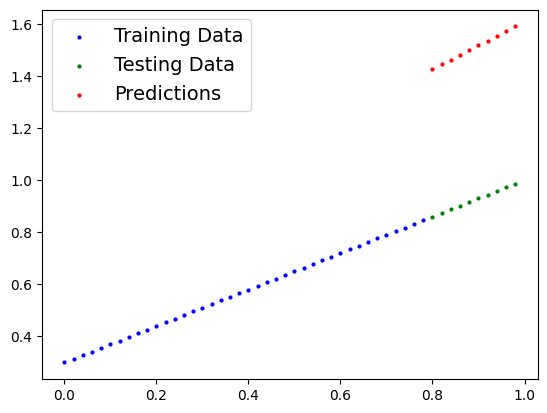

In [ ]:
# Visualising our predictions
plot_predictions(predictions= y_preds)

#Our prediction won't be very good for now

## 3. Train model

Things we need to train:

* **Cost functions:** We use criterion/loss/cost functions to measure how wrong the model predictions are to their true values. Lower is better.

* **Optimiser:** Tie together the loss function and model parameters (weights & bias) by updating the model in response to the output of the loss function. aka it tweeks the weights and bias to minimise the loss function.

Specifically in PyTorch, we will need:

* A training loop
* A testing loop

In [ ]:
# Checking our model's parameters (a value the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.9121])), ('bias', tensor([0.6958]))])

In [ ]:
# Loss function (MAE)
loss_fn = nn.L1Loss()

# Optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01) # lr is learning rate
                                       # lr is a hyperparamter, a value that we choose ourselves

## Building a training loop and testing loop in PyTorch.

0. Loop throught the data and do steps below:
1. Forward pass (data passes through the `forward()` functions to make prediction)
2. Calculate loss (compare predictions to true values)
3. OPtimizer zero grad
4. Backpropagation
5. Optimizer step - use optim to improve loss (gradient descent)

In [ ]:
# Empty lists to keep track of important values
epoch_count = []
train_loss_values = []
test_loss_values = []

# An epcoh is one loop through the data.
epochs = 200

### TRAINING
# 0. Loop through the data.
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_preds = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad() # Resets the gradients each loop

  # 4. Backpropagation on the loss with respect to the params
  loss.backward()

  # 5. Optimizer step
  optimizer.step() # optimizer changes accumulate through the loop, thus we zero them in step 3

  ### TESTING
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Train loss: 0.47848907113075256 | Test loss: 0.5710541009902954
Epoch: 10 | Train loss: 0.36327916383743286 | Test loss: 0.4363442361354828
Epoch: 20 | Train loss: 0.24806928634643555 | Test loss: 0.30163446068763733
Epoch: 30 | Train loss: 0.13285940885543823 | Test loss: 0.1669246256351471
Epoch: 40 | Train loss: 0.018156850710511208 | Test loss: 0.03426813334226608
Epoch: 50 | Train loss: 0.0068079703487455845 | Test loss: 0.014825696125626564
Epoch: 60 | Train loss: 0.003379143076017499 | Test loss: 0.007240039296448231
Epoch: 70 | Train loss: 0.008515967056155205 | Test loss: 0.005856209900230169
Epoch: 80 | Train loss: 0.008515967056155205 | Test loss: 0.005856209900230169
Epoch: 90 | Train loss: 0.008515967056155205 | Test loss: 0.005856209900230169
Epoch: 100 | Train loss: 0.008515967056155205 | Test loss: 0.005856209900230169
Epoch: 110 | Train loss: 0.008515967056155205 | Test loss: 0.005856209900230169
Epoch: 120 | Train loss: 0.008515967056155205 | Test loss: 0.0

Text(0, 0.5, 'Loss')

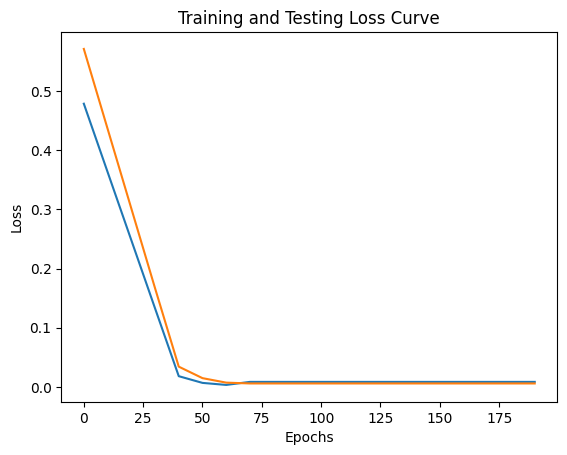

In [ ]:
#Visualising training and testing Loss Curves

plt.plot(epoch_count, train_loss_values, label = "Training Loss")
plt.plot(epoch_count, test_loss_values, label = "Testing Loss")
plt.title("Training and Testing Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

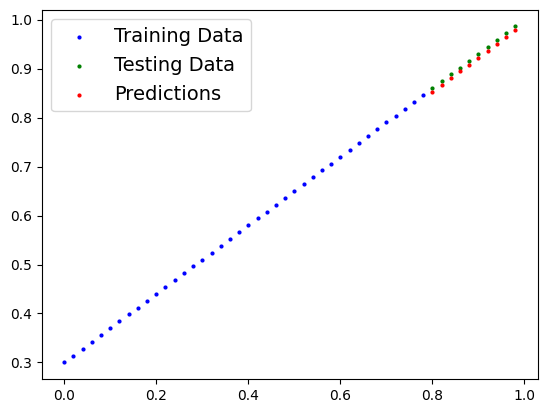

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions = y_preds_new)